# CPSC 502 Final Presentation
**Counting Preimages Under the Sum-of-Proper-Divisors Function**

Author: Gavin Guinn (#30031242)

Supervisor: Michael J. Jacobson



## Sum-of-Proper-Divisors

The *sum-of-divisors* function is defined for $n > 1$ by:
$$\sigma(n) = \sum_{d|n} d.$$

The *proper-divisors* of $n$ refers to the subset of the divisors which excludes itself, the *sum-of-proper-divisors* is defined for $n > 1$ by:
$$s(n) = \sigma(n) - n,$$

Proving that $\sigma(n)$ is less than a bound defined by the $n$'th harmonic number is equivalent to the Riemann hypothesis (source: https://oeis.org/A000203, Ilya Gutkovskiy). 

Studied since antiquity with Pythagoras first considering perfect numbers and Euclid crafting a expression to determine a subset of perfect numbers (https://math.dartmouth.edu/~carlp/firstfunctionbcmit.pdf).


### Computing Sum-of-Proper-Divisors

- Perfect Numbers (OEIS A000396) = [6, 28, 496, 8128, ...]
- Deficient Numbers (OEIS A005100) = [1, 2, 3, 4, 5, 7, 8, 9, 10, ...]
- Abundant Numbers (OEIS A005101) = [12, 18, 20, 24, 30, 36, 40, 42, ...]

In [26]:
from math import sqrt
""""Computes the sum-of-proper-divisors of n"""

# input:
n = 22

divisors = [1]
i = 2
while i <= n/2:
    if n % i == 0:
        divisors.append(i)
    i = i + 1 
sn = sum(divisors)
abundance = sn / n
print("proper divisors {}: {}".format(n, sorted(divisors)))
print("s({}) = {} (abundance ratio: {:.2f})".format(n, sn, abundance))
print()
n = sn


proper divisors 22: [1, 2, 11]
s(22) = 14 (abundance ratio: 0.64)



## Aliquot Sequences


Sequence of values produced by iterating the *sum-of-proper-divisors* function.

- Amicable Numbers (OEIS A063990) = [(220, 284), (1184, 1210), (2620, 2924), ... ]
- 4-cycle (OEIS A131884) = [1264460, ...]
- Lehmer Five (OEIS A131884) = [276, 552, 564, 660, 966]

Zimmerman has followed the 276 sequence to values with over [200 digits!](https://web.archive.org/web/20211006013949/http://christophe.clavier.free.fr:80/Aliquot/site/zimmermann_table.html)

In [25]:
from sympy.ntheory import factorint

#input
n = 276
limit = 10**11

# https://www2.math.upenn.edu/~deturck/m170/wk3/lecture/sumdiv.html
def s(n):
    """ @brief Compute the sum-of-proper-divisors of n """
    factors = factorint(n)
    product = 1
    for p in factors:
        prime_exp_sum = 0
        for e in range(0, factors[p]+1): # need inclusive upper lim
            prime_exp_sum += p ** e
        product *= prime_exp_sum
    return product - n
  
def aliquot_seq(n, lim):
    """ @brief Prints aliquot seq starting at n, halts if s(n) > lim"""
    s_n = [n]
    while n > 1 and n < lim:
        n = s(n)
        if n in s_n:
            print("repeated with", n)
            break
        s_n.append(n)
    return s_n

aliquot_seq(n, limit)

[276,
 396,
 696,
 1104,
 1872,
 3770,
 3790,
 3050,
 2716,
 2772,
 5964,
 10164,
 19628,
 19684,
 22876,
 26404,
 30044,
 33796,
 38780,
 54628,
 54684,
 111300,
 263676,
 465668,
 465724,
 465780,
 1026060,
 2325540,
 5335260,
 11738916,
 23117724,
 45956820,
 121129260,
 266485716,
 558454764,
 1092873236,
 1470806764,
 1471882804,
 1642613196,
 2737688884,
 2740114636,
 2791337780,
 4946860492,
 4946860548,
 9344070652,
 9344070708,
 15573451404,
 27078171764,
 27284104204,
 27410152084,
 27410152140,
 76787720100,
 220578719452]

### Termination of Aliquot Sequences

#### Catalan Dickson Conjecture
All aliquot sequences are bounded and thus must terminate or enter a cycle.

#### Guy-Selfridge Conjecture
The Catalan-Dickson conjecture is false, perhaps most aliquot sequences are unbounded.

#### Geometric Mean of s(n) over even n 

$$\lim_{N \to \infty} \exp{\left( \frac{1}{N} \sum_{n=1}^{N} \log s(2n) / 2n \right) =  0.969...}$$

Suggests that aliquot sequences tend to decrease for even numbers.

## Preimages Under s(n)



Consider the equation $s(n) = m$, where $m$ is the *image* of $n$ under the sum-of-proper-divisors function; computationally this is equivalent to factoring $n$. A harder problem is to compute the *preimages* of $n$, all integers $m$ such that $s(m) = n$ expressed as $s^{-1}(n)$.

$$s^{-1}(n) = \{x \,|\, s(x) = n\}$$
$$\#s^{-1}(n) = |\{x \,|\, s(x) = n\}|$$

###### import numpy as np
from aliquot_util import *

# input:
n = 4
lim = 10 ** 4

def ennum_sn(lim):
    """ @brief Computes https://oeis.org/A001065 upto and including max"""
    sn_ennum = np.zeros(lim)
    for i in range(1, lim + 1):
        sn_ennum[i-1] = s(i)
    return sn_ennum

def get_preimages(n, lim):
    """ @brief Searches for preimages of n in an enumerated range of s(n)
        @note Pomerance-Yang algorithm could vastly speed this up"""
    sn_ennum = ennum_sn(lim)
    pre_images = list(np.where(sn_ennum == n)[0])
    pre_images = [x+1 for x in pre_images] # gotta add 1 to offset indexes to numbers
    return pre_images

get_preimages(n, lim)


### Definitions
- A preimage of $n$ is it's *parent*.
- A $k$-parent number has $k$ preimages (OEIS A283156).
- A number with no preimages is referred to as: 
    - non-aliquot 
    - aliquot orphan
    - untouchable
    - 0-parent

### Project Motivation
> Think of a number!! Say $36$\%, which is nice and divisible. It appears that about $36$\% of the even numbers are "orphans".
>
> Divide by 1. For about $36$\% of the (even) values of n there is just one positive integer m such that $s(m) = n$. These values of $n$ have just one "parent".
>
> Divide by 2.  About $18$\% of the even values of $n$ have exactly two parents.
>
> Divide by 3. About $6$\% of the even values of $n$ have three parents.
>
> Divide by 4. About $1.5$\% of the even values of $n$ have just 4 parents.
>
> This suggests that $1 / (e \cdot p!)$ of the even numbers have $p$ parents.
> Experiments suggests that these values are a bit large for small values of $p$ and a bit small for larger values of $p$. Can anything be proved?
>
> **Dr. Richard Guy**


## Estimating the Density of $k$-Parent Numbers

### Pollack-Pomerance Model for Non-Aliquot Density 
The set of non-aliquot numbers has asymptotic density $\Delta \approx 0.1718$ (density over all numbers, not just evens),
$$\Delta = \lim_{y \to \infty}\frac{1}{\log y} \sum_{\substack{a\leq y \\ 2 | a}} \frac{1}{a}\text{e}^{-a/s(a)}.$$

This model is an application of the *balls into bins* statistics problem, estimating the result after throwing $m$ balls randomly into $n$ bins;
$$\#[\text{empty bins}] = n(1- \frac{1}{n})^m.$$

In short this model is constructed by defining disjoint sets of numbers with similar properties under $s(n)$. The density of non-aliquots is estimated using *balls into bins* for each of these sets; we choose a range of *bins*, the *balls* are numbers $n$ such $s(n) \in \textit{bins}$. The density of empty *bins* in each of these sets is summed together to estimate non-aliquot density.

- Assume that $s(\cdot)$ maps every member back to its set. 
- Assume $s(n) / n$ is the same for each member of a set.
- Assume that $s(\cdot)$ is a random map.

### Modeling $k$-Parent Density
Pollack and Pomerance used the probability of a *bin* remaining empty to model non-aliquot density, we can extend this model by considering the probability that a *bin* contains $k$ *balls*,
$$\mathbb{P}[k \text{ balls in bin}] = {m \choose k } \frac{1}{n^k} (1- \frac{1}{n})^{m-k}.$$

The set of numbers with $k$-parents has asymptotic density,
$$\Delta_k = \lim_{y \to \infty} \frac{1}{\log y}\sum_{\substack{a\leq y \\ 2 | a}} \frac{a^{k-1}}{k! \cdot s(a)^k} \cdot \text{e}^{-a/s(a)}$$

In [28]:
from math import factorial, exp, log
from sympy import proper_divisors

# input:
y = 10 ** 5
k_lim = 8

def delta_k(y, k_lim):
    summations = [0 for x in range(k_lim)]
    for k in range(0, k_lim):
        for a in [2*x for x in range(1, (int)(y/2) + 1)]:
            s_a = sum(proper_divisors(a))
            frac = (a ** (k - 1)) / (factorial(k) * (s_a ** k))
            e = exp(-a / s_a)
            summations[k] = summations[k] + frac * e

        summations[k] *= 1 / log(y)
        print("delta({}) = {:.16f}".format(k, summations[k]))

delta_k(y, k_lim)

delta(0) = 0.1645765756616132
delta(1) = 0.1659234660464651
delta(2) = 0.0971371924889134
delta(3) = 0.0435064344804649
delta(4) = 0.0163728786749793
delta(5) = 0.0053688978779315
delta(6) = 0.0015580237648017
delta(7) = 0.0004036559113206


## Computing the Density of $k$-Parent Numbers

The Pomerance-Yang algorithm computes the preimages of all even numbers less than $x$, numerically determining the density of k-parent numbers.

In [31]:
from sympy import divisor_sigma, proper_divisors, isprime

# input
x = 10 ** 5

def pomyang(x):
    f = [0 for x in range(x + 1)]
    for m in range(1, x, 2): # odd numbers
        sigma_m = divisor_sigma(m)
        if 0 == (sigma_m % 2):
            t = (3 * sigma_m) - (2 * m)
            while t <= x:
                f[t] += 1
                t = (2 * t) + sigma_m
        if sigma_m == m + 1: # m prime
            f[sigma_m] += 1

    for m in range(1, int(x ** (2/3)), 2): # odd numbers
        s_msq = sum(proper_divisors(m ** 2))
        if (not isprime(m)) and (s_msq <= x):
            f[s_msq] += 1
    
    return f

def count_kparent(f):
    counts = [0 for x in range(256)]
    for i in range(2, len(f), 2): # odd numbers
        counts[f[i]] += 1
    counts[0] += 1 # account for 5, the only odd nonaliquot
    return counts

counts = count_kparent(pomyang(x))
print("Counts of k-parent numbers up-to {}".format(x))
for i in range(8):
    print("k = {}: {}".format(i, counts[i]))


Counts of k-parent numbers up-to 100000
k = 0: 13863
k = 1: 18212
k = 2: 10838
k = 3: 4456
k = 4: 1570
k = 5: 583
k = 6: 242
k = 7: 126


### High Performance Compute

To gather data on the density of $k$-parent numbers I have implemented this algorithm in C/OpenMP, utilizing up-to *1.5tb* of memory and *80 cores* on uCalgary's Advanced Research Computing (ARC) *bigmem* cluster.  These improvements have enabled the collection of non-aliquot counts up-to $2^{44}$ from the previous maximum result of $2^{40}$ while utilizing substantially less CPU time.

In concrete terms previous implementations utilize 662 CPU days to compute $\#s^{-1}(n)$ for even $n \leq 2^{40}$, my implementation required 3.6 CPU days.

In [32]:
import os

# input:
bound = 10 ** 8
seg_len = 10 ** 6
num_locks = 10 ** 7
num_threads = 12
preimage_count_bits = 8

cmd = "cd ../pomyang_kparent && make cli && time ../pomyang_kparent/bin/cli"
args = " --bound={} --seg_len={} --num_locks={} --num_threads={} --preimage_count_bits={}".format(bound, seg_len,num_locks, num_threads, preimage_count_bits) 
output = os.popen(cmd + args).read()
print(output)

mkdir -p bin
gcc -g -fopenmp -Wall -Wextra -Wshadow -std=c99 -Wpedantic -O3 -Wstrict-overflow -fno-strict-aliasing -I../inc -o bin/cli src/pomyang_cli_main.c obj/moewsmoews_sieve.o obj/factor.o obj/pomyang_kparent.o obj/PackedArray.o -lpthread -lm -lgmp

ESTIMATED MEMORY USAGE
Sieving buffers take 91.56mb
This configuration will use a minimum of: 
	192,007,432 B
	0.19 GB

POMYANG CONFIG
-> Using 8 bits per number, count between 0-255 preimages
-> Bound = 100000000
-> Segment Length = 1000000
-> Number of locks = 10000000
-> Number of segments = 100
-> Max number of threads = 12
-> Bound^(2/3) = 215443.47

RUNNING STATS


TABULATION
Time: 0.12s
Odd k-parent count under 100000000:
0: 16246939
1: 17276203
2: 9701671
3: 4086682
4: 1550360
5: 600548
6: 253721
7: 121383



10.63user 0.20system 0:01.39elapsed 777%CPU (0avgtext+0avgdata 190092maxresident)k
0inputs+8outputs (0major+59288minor)pagefaults 0swaps


### Computed Densities of k-Parent Numbers

| Exp           | k = 0    | k = 1    | k = 2    | k = 3    | k = 4    | k = 5    | k = 6    | k = 7    |
|---------------|----------|----------|----------|----------|----------|----------|----------|----------|
| $y = 10^{2}$  | 0.050000 | 0.260000 | 0.160000 | 0.040000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 |
| $y = 10^{3}$  | 0.089000 | 0.202000 | 0.148000 | 0.048000 | 0.009000 | 0.005000 | 0.000000 | 0.000000 |
| $y = 10^{4}$  | 0.121200 | 0.186700 | 0.120800 | 0.047600 | 0.015000 | 0.005200 | 0.001700 | 0.001500 |
| $y = 10^{5}$  | 0.138630 | 0.182120 | 0.108380 | 0.044560 | 0.015700 | 0.005830 | 0.002420 | 0.001260 |
| $y = 10^{6}$  | 0.150232 | 0.177507 | 0.102694 | 0.042456 | 0.015772 | 0.006030 | 0.002555 | 0.001261 |
| $y = 10^{7}$  | 0.157497 | 0.174789 | 0.099095 | 0.041556 | 0.015596 | 0.006027 | 0.002582 | 0.001249 |
| $y = 10^{8}$  | 0.162469 | 0.172762 | 0.097017 | 0.040867 | 0.015504 | 0.006005 | 0.002537 | 0.001214 |
| $y = 10^{10}$ | 0.168187 | 0.170619 | 0.094786 | 0.040166 | 0.015303 | 0.005856 | 0.002427 | 0.001128 |
| $y = 10^{11}$ | 0.169881 | 0.170045 | 0.094206 | 0.039972 | 0.015210 | 0.005778 | 0.002364 | 0.001083 |
| $y = 10^{12}$ | 0.171129 | 0.169658 | 0.093821 | 0.039831 | 0.015125 | 0.005701 | 0.002303 | 0.001040 |
| $y = 2^{40}$  | 0.171173 | 0.169645 | 0.093808 | 0.039826 | 0.015122 | 0.005698 | 0.002300 | 0.001038 |
| $y = 2^{41}$  | 0.171480 | 0.169556 | 0.093719 | 0.039792 | 0.015099 | 0.005676 | 0.002282 | 0.001026 |
| $y = 2^{42}$  | 0.171763 | 0.169478 | 0.093641 | 0.039761 | 0.015076 | 0.005654 | 0.002265 | 0.001014 |
| $y = 2^{43}$  | 0.172023 | 0.169408 | 0.093571 | -        | -        | -        | -        | -        |
| $y = 2^{44}$  | 0.172264 | -        | -        | -        | -        | -        | -        | -        |

Computed densities of $k$-parent numbers up-to bound $y$, $P_k = \{n \,|\, s^{-1}(n) = k\}$.

## Comparing Estimated and Computed $k$-Parent Density


| $\Delta_{k}$            | $k = 0$ | $k = 1$ | $k = 2$ | $k = 3$ | $k = 4$ | $k = 5$ | $k = 6$ | $k = 7$ | $k = 8$ |
|-------------------------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| $y = 10^{6}$            |  0.1669 |  0.1663 |  0.0964 |  0.0428 |  0.0160 |  0.0052 |  0.0015 |  0.0004 |  0.0001 |
| $y = 10^{7}$            |  0.1686 |  0.1666 |  0.0959 |  0.0424 |  0.0158 |  0.0051 |  0.0015 |  0.0004 |  0.0001 |
| $y = 10^{8}$            |  0.1699 |  0.1669 |  0.0955 |  0.0420 |  0.0156 |  0.0051 |  0.0015 |  0.0004 |  0.0001 |
| $y = 10^{9}$            |  0.1708 |  0.1670 |  0.0952 |  0.0417 |  0.0154 |  0.0050 |  0.0014 |  0.0004 |  0.0001 |
| $y = 10^{10}$           |  0.1716 |  0.1672 |  0.0950 |  0.0415 |  0.0153 |  0.0050 |  0.0014 |  0.0004 |  0.0001 |
| $y = 2(10^{10})$        |  0.1718 |  0.1672 |  0.0949 |  0.0415 |  0.0153 |  0.0049 |  0.0014 |  0.0004 |  0.0001 |
|                         |         |         |         |         |         |         |         |         |         |
| $d_y(P_k)$              | $k = 0$ | $k = 1$ | $k = 2$ | $k = 3$ | $k = 4$ | $k = 5$ | $k = 6$ | $k = 7$ | $k = 8$ |
| $y = 2^{41}$            |  0.1715 |  0.1696 |  0.0937 |  0.0398 |  0.0151 |  0.0057 |  0.0023 |  0.0010 |  0.0005 |
|                         |         |         |         |         |         |         |         |         |         |
| $d_y(P_k) / \Delta_{k}$ | $k = 0$ | $k = 1$ | $k = 2$ | $k = 3$ | $k = 4$ | $k = 5$ | $k = 6$ | $k = 7$ | $k = 8$ |
| $y = 10^{6}$            |   1.027 |   1.019 |   0.972 |   0.929 |   0.942 |   1.085 |   1.508 |   2.624 |   5.710 |
| $y = 10^{7}$            |   1.017 |   1.018 |   0.977 |   0.939 |   0.957 |   1.106 |   1.541 |   2.686 |   5.854 |
| $y = 10^{8}$            |   1.010 |   1.016 |   0.981 |   0.947 |   0.968 |   1.122 |   1.567 |   2.735 |   5.967 |
| $y = 10^{9}$            |   1.004 |   1.015 |   0.984 |   0.953 |   0.977 |   1.135 |   1.587 |   2.774 |   6.057 |
| $y = 10^{10}$           |   0.999 |   1.014 |   0.987 |   0.958 |   0.985 |   1.145 |   1.604 |   2.806 |   6.132 |
| $y = 2(10^{10})$        |   0.998 |   1.014 |   0.987 |   0.960 |   0.987 |   1.148 |   1.608 |   2.814 |   6.152 |

Ratio comparing the observed density of $k$-parent numbers to the estimates of the heuristic model. $P_k = \{n \,|\, s^{-1}(n) = k\}$ is the set of numbers with $k$-parents and $d_y(P_k) = (P_k \cap [1,\,y]) / y$ is the density of $k$-parent numbers.

In [15]:
import aliquot_util
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (25,5)
plt.rcParams['figure.dpi'] = 200

ennum = aliquot_util.ennum_sn(10**5)

[276, 396, 696, 1104, 1872, 3770, 3790, 3050, 2716, 2772, 5964, 10164, 19628, 19684, 22876, 26404, 30044, 33796, 38780, 54628, 54684, 111300]


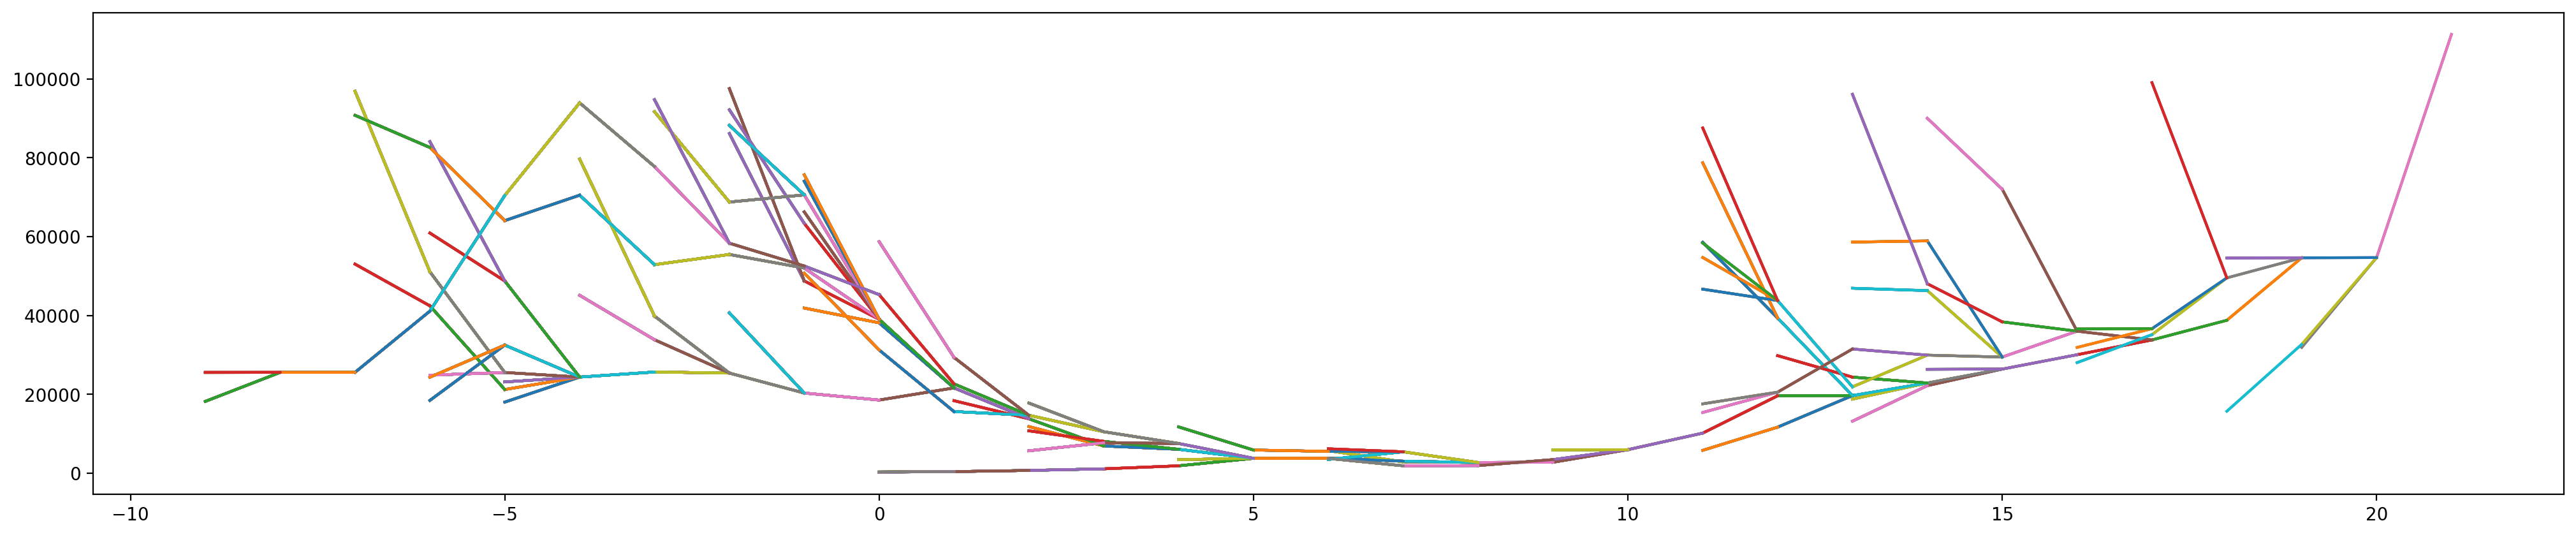

<Figure size 8000x8000 with 0 Axes>

In [16]:
aliquot_util.plot_aliquot_family(276, ennum)